# Cardia

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
# precision_recall_curve visualise la précision et sensibilité du modèle, selon un seuil de prédiction (threshold)
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# svc est efficace sur un dataset de petite ou intermédiaire shape (1000 - 10000)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline

# RandomizedSearchCV evalue plusieurs combinaisons possibles d'hyper-paramètres
from sklearn.model_selection import GridSearchCV

import pickle

# Exploratory Data Analysis

In [2]:
# Charge le dataset coeur
data = pd.read_excel("./dataset/cœur.xlsx")

In [3]:
# Copie data dans df
df = data.copy()
df.head()

,AGE,SEXE,TDT,PAS,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40.0,homme,AA,140.0,289.0,0.0,Normal,172.0,Non,0.0,Ascendant,0.0
1,49.0,femme,DNA,160.0,180.0,0.0,Normal,156.0,Non,1.0,Plat,1.0
2,37.0,homme,AA,130.0,283.0,0.0,ST,98.0,Non,0.0,Ascendant,0.0
3,48.0,femme,ASY,138.0,214.0,0.0,Normal,108.0,Oui,1.5,Plat,1.0
4,54.0,homme,DNA,150.0,195.0,0.0,Normal,122.0,Non,0.0,Ascendant,0.0


## Analyse de forme

In [4]:
# Modifie le type de variables
def modify_int(data, column):
    data[column] = data[column].astype("int64")

modify_int(df, "AGE")
modify_int(df, "PAS")
modify_int(df, "CHOLESTEROL")
modify_int(df, "GAJ")
modify_int(df, "FCMAX")
modify_int(df, "CŒUR")

In [5]:
# Affiche les informations relatives à df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAS          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# Compte le nombre de lignes dupliquées
df.duplicated().sum()

# Interpretation
# Pas de doublons

0

<AxesSubplot:>

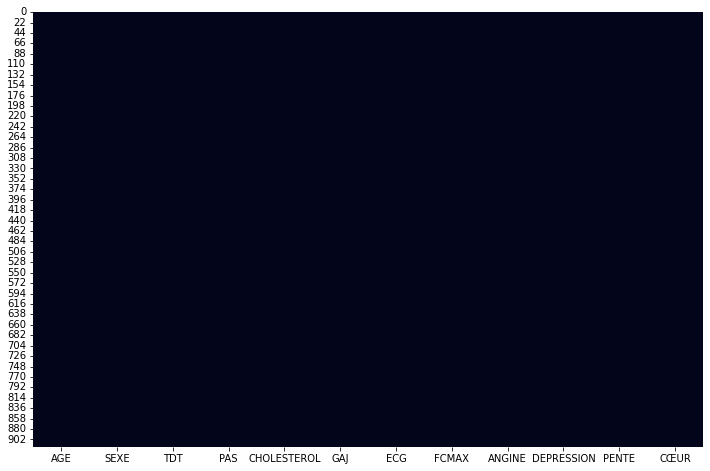

In [7]:
# Visualise df selon les données manquantes
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cbar=False)

# Interpretation
# Pas de données manquantes

In [8]:
# Affiche le nombre de valeur de chaque variable
df.nunique()

# Interpretation
# Pas de variables constantes - chaque variable ayant au minimum deux valeurs distinctes

AGE             50
SEXE             2
TDT              4
PAS             67
CHOLESTEROL    222
GAJ              2
ECG              3
FCMAX          119
ANGINE           2
DEPRESSION      53
PENTE            3
CŒUR             2
dtype: int64

## Analyse de fond

In [9]:
# Visualise la target
df["CŒUR"].value_counts(normalize=True)

# Interpretation
# 55% positifs - 45% negatifs

1    0.553377
0    0.446623
Name: CŒUR, dtype: float64

C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


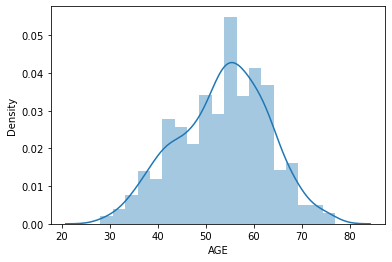

C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


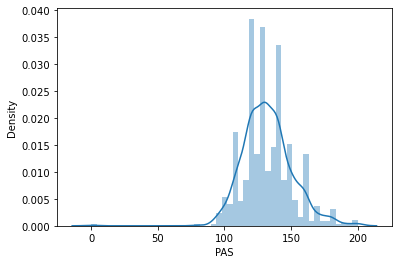

C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


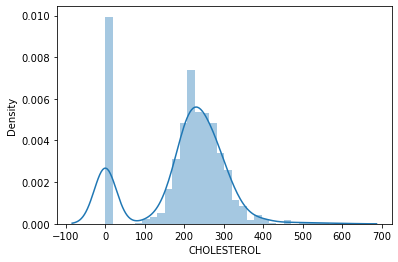

C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


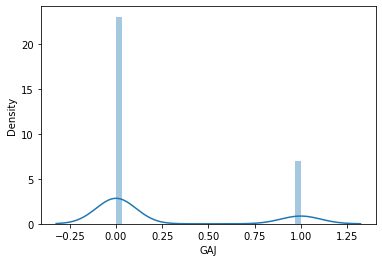

C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


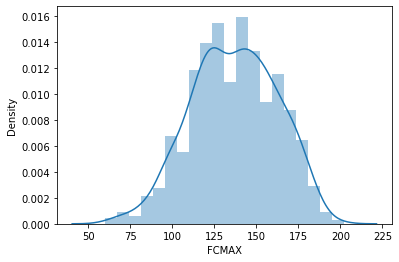

C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


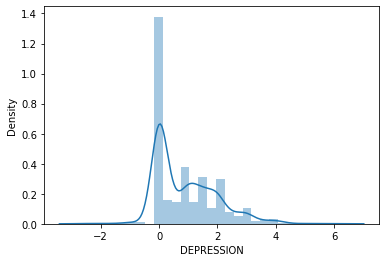

C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


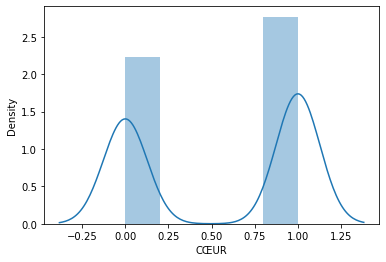

In [10]:
# Trace l'histogramme des variables numériques
for feature in df.select_dtypes(np.number):
    plt.figure()
    sns.distplot(df[feature])
    plt.show()

In [11]:
# Affiche le pourcentage de catégories de chaque variables qualitatives
for feature in df.select_dtypes("object"):
    print(df[feature].value_counts(normalize=True))
    print("--------------------------")

homme    0.78976
femme    0.21024
Name: SEXE, dtype: float64
--------------------------
ASY    0.540305
DNA    0.221133
AA     0.188453
AT     0.050109
Name: TDT, dtype: float64
--------------------------
Normal    0.601307
LVH       0.204793
ST        0.193900
Name: ECG, dtype: float64
--------------------------
Non    0.595861
Oui    0.404139
Name: ANGINE, dtype: float64
--------------------------
Plat          0.501089
Ascendant     0.430283
Descendant    0.068627
Name: PENTE, dtype: float64
--------------------------


In [12]:
# Crée deux sous-ensembles de target - positive : 1 - negative : 0
positive_df = df[df["CŒUR"] == 1]
negative_df = df[df["CŒUR"] == 0]

C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


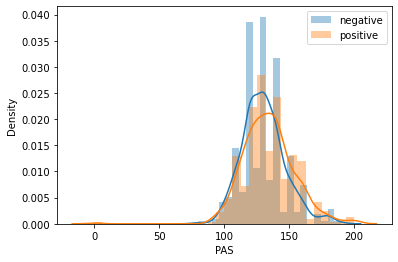

C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


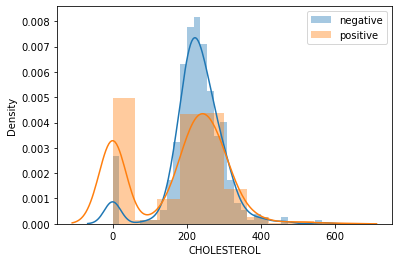

C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


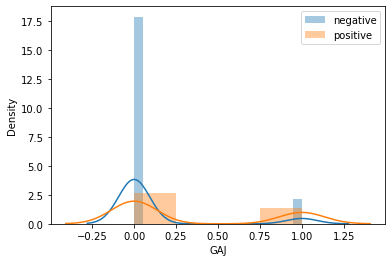

C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


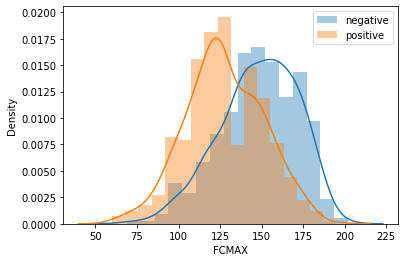

C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valentin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


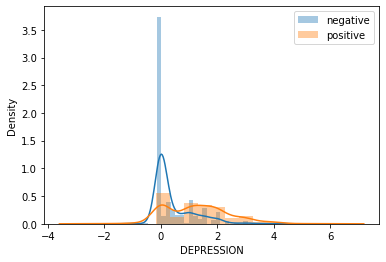

In [13]:
# Affiche les relations : features quantitatives - target
for feature in df.drop(["CŒUR", "AGE"], axis=1).select_dtypes(np.number):
    plt.figure()
    sns.distplot(negative_df[feature], label="negative")
    sns.distplot(positive_df[feature], label="positive")
    plt.legend()
    plt.show()

<AxesSubplot:xlabel='AGE', ylabel='count'>

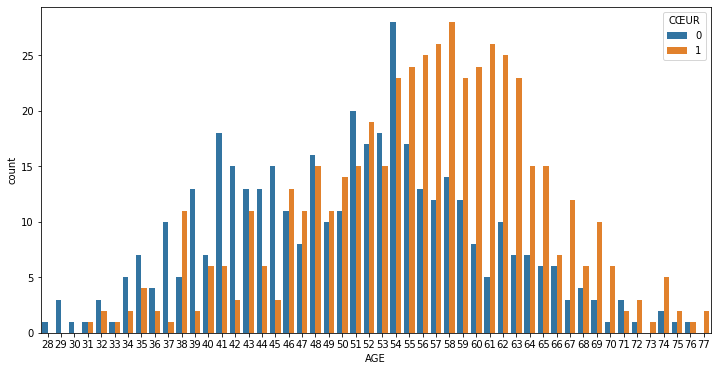

In [14]:
# Compte le nombre d'apparition de patient selon l'age et le statut
plt.figure(figsize=(12, 6))
sns.countplot(x="AGE", hue="CŒUR", data=df)

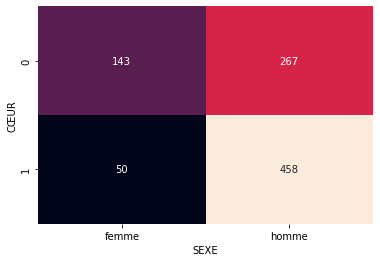

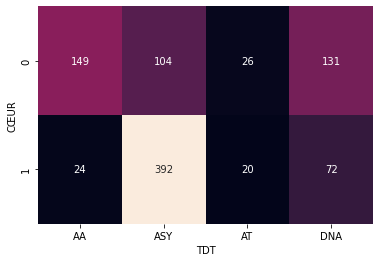

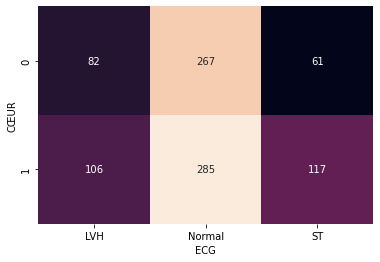

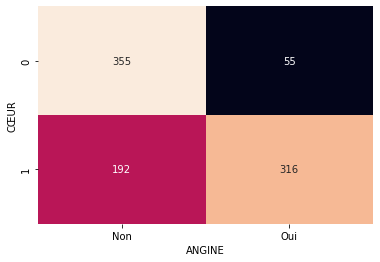

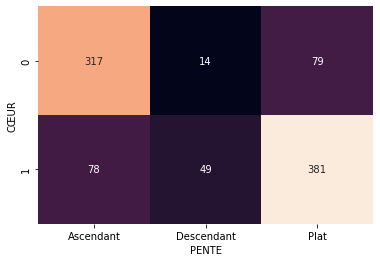

In [15]:
# Affiche les relations : features qualitatives - target
for feature in df.select_dtypes("object"):
    plt.figure()
    # annot=True affiche les noms, fmt="d" affiche en entier
    sns.heatmap(pd.crosstab(df["CŒUR"], df[feature]), annot=True, fmt="d", cbar=False)

# Preprocessing

In [16]:
# Découpe df
train_set, test_set = train_test_split(df, test_size=0.3, random_state=0)

In [17]:
print("Train Set \n", train_set["CŒUR"].value_counts())
print("------------------------")
print("Test Set \n", test_set["CŒUR"].value_counts())

Train Set 
 1    345
0    297
Name: CŒUR, dtype: int64
------------------------
Test Set 
 1    163
0    113
Name: CŒUR, dtype: int64


In [18]:
# Standardiser les variables quantitatives
def standard(data):    
    for feature in data.drop("CŒUR", axis=1).select_dtypes(np.number):
        data.loc[:, feature] = (data[feature] - data[feature].mean()) / data[feature].std()

    return data

In [19]:
# Encoder les variables qualitatives
def encode(data):
    code = {
        "homme": 0, "femme": 1, 
        "ASY": 0, "DNA": 1, "AA": 2, "AT": 3, 
        "Normal": 0, "LVH": 1, "ST": 2, 
        "Non": 0, "Oui": 1, 
        "Plat": 0, "Ascendant": 1, "Descendant": 2
    }

    for feature in data.select_dtypes("object"):
        data.loc[:, feature] = data[feature].map(code)

    return data

In [20]:
# Preprocessing - standardisation et encodage
def preprocessing(data):
    data = standard(data)
    data = encode(data)

    # Features et Target
    x = data.drop("CŒUR", axis=1)
    y = data["CŒUR"]

    return x, y

In [21]:
# Applique la fonction de preprocessing
x_train, y_train = preprocessing(train_set)
x_test, y_test = preprocessing(test_set)

C:\Users\Valentin\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [22]:
# Affiche le nouveau train set
train_set.head()

,AGE,SEXE,TDT,PAS,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
76,-2.283568,0,0,-0.788581,3.075741,-0.520447,0,-0.285498,0,-0.839869,0,1
48,-1.860496,0,1,-1.107256,1.305499,-0.520447,0,1.838460,0,0.104267,0,0
304,-0.273976,0,0,-2.010169,-1.879064,1.918434,0,-0.442828,0,1.237229,0,1
263,0.572169,0,0,-0.151230,-0.698903,-0.520447,0,-0.482161,0,-0.839869,0,1
744,0.677937,0,0,-0.841693,0.275199,1.918434,0,0.894479,1,0.481921,1,1


In [23]:
# Affiche la répartition
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(642, 11) (276, 11) (642,) (276,)


# Modelisation

In [24]:
# include_bias=False retire la colonne de biais
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False))

In [25]:
# Initialise les modèles
svm = make_pipeline(preprocessor, SVC(random_state=0, probability=True))
lr = make_pipeline(preprocessor, LogisticRegression(random_state=0))

In [26]:
# Sélectionne les modèles
dict_models = {"SVM": svm, "LR": lr}

In [27]:
# Procédure d'évaluation des modèles
def evalue(model):
    # Entraîne le modèle puis l'évalue
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Learning Curve
    n, train_score, validation_score = learning_curve(model, x_train, y_train, 
                                                    cv=4, scoring="f1", train_sizes=np.linspace(0.1, 1, 10))

    # Trace la figure
    plt.figure(figsize=(10, 8))
    plt.plot(n, train_score.mean(axis=1), label="train score")
    plt.plot(n, validation_score.mean(axis=1), label="validation score")
    plt.legend()
    plt.show()

SVM
[[ 88  25]
 [ 16 147]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       113
           1       0.85      0.90      0.88       163

    accuracy                           0.85       276
   macro avg       0.85      0.84      0.84       276
weighted avg       0.85      0.85      0.85       276



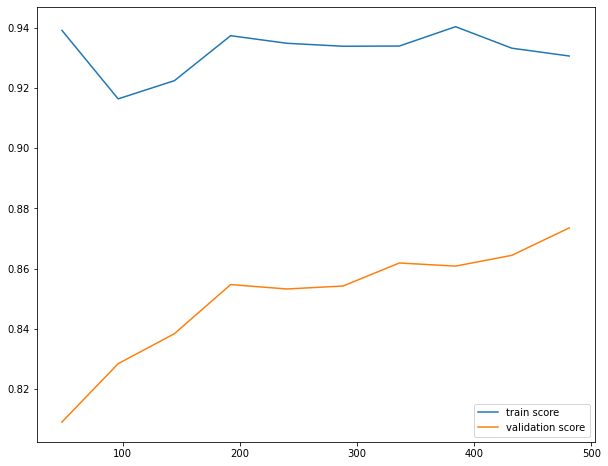

--------------------------------------------------------------------------------------
LR


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 94  19]
 [ 19 144]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       113
           1       0.88      0.88      0.88       163

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



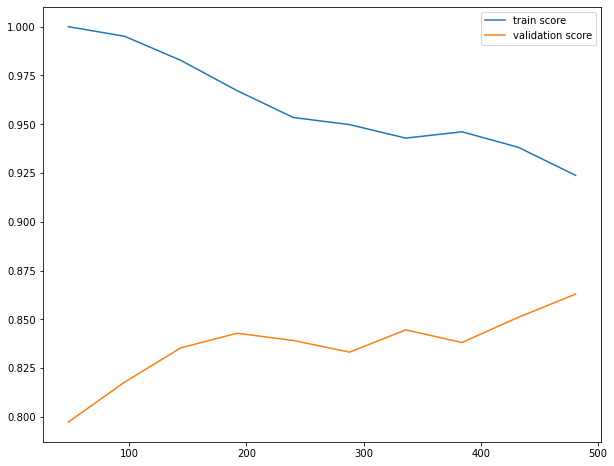

--------------------------------------------------------------------------------------


In [28]:
for name, model in dict_models.items():
    print(name)
    evalue(model)
    print("--------------------------------------------------------------------------------------")

## Optimisation

In [29]:
# Affiche les hyperparamètres
svm

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False))])),
                ('svc', SVC(probability=True, random_state=0))])

In [30]:
# svc__gamma et svc__C sélectionne les hyper-paramètres gamma et C de la step svc
# Sélectionne les hyperparamètres pour GridSearchCV
hyper_params = {"svc__gamma": [1e-3, 1e-4], 
                "svc__C": [1, 10, 100, 1000], 
                "pipeline__polynomialfeatures__degree": [2, 3, 4]}

In [31]:
# Applique GridSearchCV à svm
grid = GridSearchCV(svm, hyper_params, scoring="f1", cv=4)

grid.fit(x_train, y_train)

# Affiche les meilleurs hyper-paramètres
print(grid.best_params_)

y_pred = grid.predict(x_test)
print(classification_report(y_test, y_pred))

{'pipeline__polynomialfeatures__degree': 2, 'svc__C': 100, 'svc__gamma': 0.0001}
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       113
           1       0.88      0.88      0.88       163

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276



[[ 93  20]
 [ 20 143]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       113
           1       0.88      0.88      0.88       163

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276



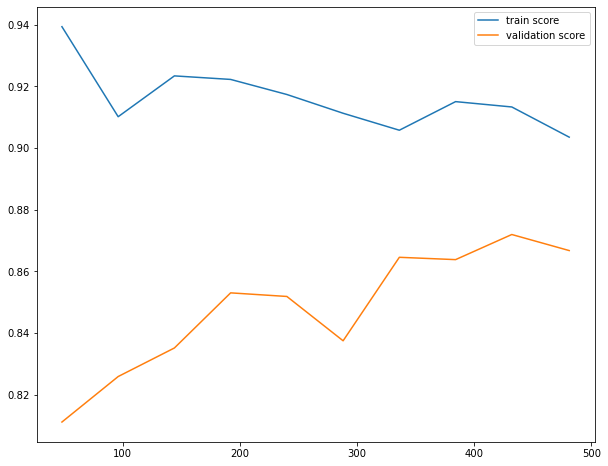

In [32]:
evalue(grid.best_estimator_)

In [33]:
# decision_function calcule les probabilités qui comparées au threshold, permet d'effectuer les prédictions
precision, recall, threshold = precision_recall_curve(y_train, grid.best_estimator_.decision_function(x_train))

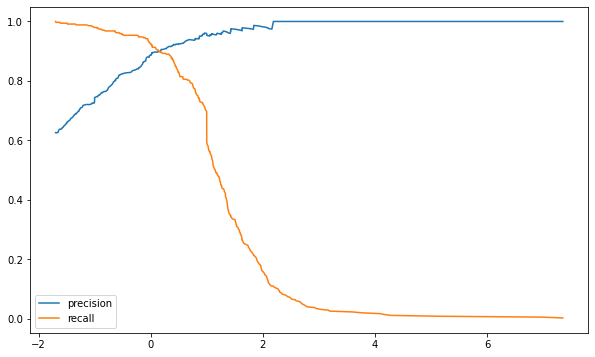

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(threshold, precision[:-1], label="precision")
plt.plot(threshold, recall[:-1], label="recall")
plt.legend()

In [35]:
# Fonction de prédiction
def model_final(model, features, threshold=0):
    # true -> positif - false -> négatif
    return model.decision_function(features) > threshold

In [36]:
y_pred = model_final(grid.best_estimator_, x_test, threshold=0.08)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       113
           1       0.89      0.88      0.88       163

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



In [37]:
print(y_pred[:10])
print(grid.best_estimator_.predict(x_test)[:10])

[ True  True  True  True False False False False False False]
[1 1 1 1 0 0 0 0 0 0]


In [38]:
print(grid.best_estimator_.predict_proba(x_test)[:10])

# Interpretation
# Ne retenir que les résultats supérieurs à 80%

[[0.07228387 0.92771613]
 [0.28361555 0.71638445]
 [0.042274   0.957726  ]
 [0.17143355 0.82856645]
 [0.83969798 0.16030202]
 [0.82491984 0.17508016]
 [0.9826535  0.0173465 ]
 [0.98556088 0.01443912]
 [0.90104298 0.09895702]
 [0.83570117 0.16429883]]


In [39]:
y_test.head(10)

306    1
711    0
298    1
466    1
253    0
230    0
906    0
14     0
202    0
31     0
Name: CŒUR, dtype: int64

In [40]:
modelSVC = grid.best_estimator_

In [41]:
# Enregistre le modèle dans un fichier pickle
with open("cardiaSVC.pickle", "wb") as file:
    pickle.dump(modelSVC, file)